# A simple stock-flow consistent (SFC) Model (Godley and Lavoie 2007)

This Jupyter Notebook simulates a simple SFC model of a closed economy proposed by Wynne Godley and Marc Lavoie (http://www.levyinstitute.org/pubs/wp_494.pdf). The idea of a SFC model is to model the economy from an accounting perspective: Every flow goes from one agent to another, the sum of flows in the economy is always 0 and the balance sheet of the whole economy always perfectly balanced - otherwise, there must be a mistake.

The following baseline model has three agents (households, firm, government) and makes multiple simplifying assumptions:
1. Total GDP grows with the exogenous rate gr
2. Inflation is exogenous
3. The production process and capital accumulation of the firm sector is not modelled

Do these unrealistic assumptions make the model useless? Not at all, since it captures all relevant flows for a very rough depiction of the economy and is internally consistent.  Moreover, the model can easily be extended (e.g., by adding a foreign sector).

The core of every SFC model is its transactions-flow matrix, in the paper by Godley and Lavoie it looks like this:

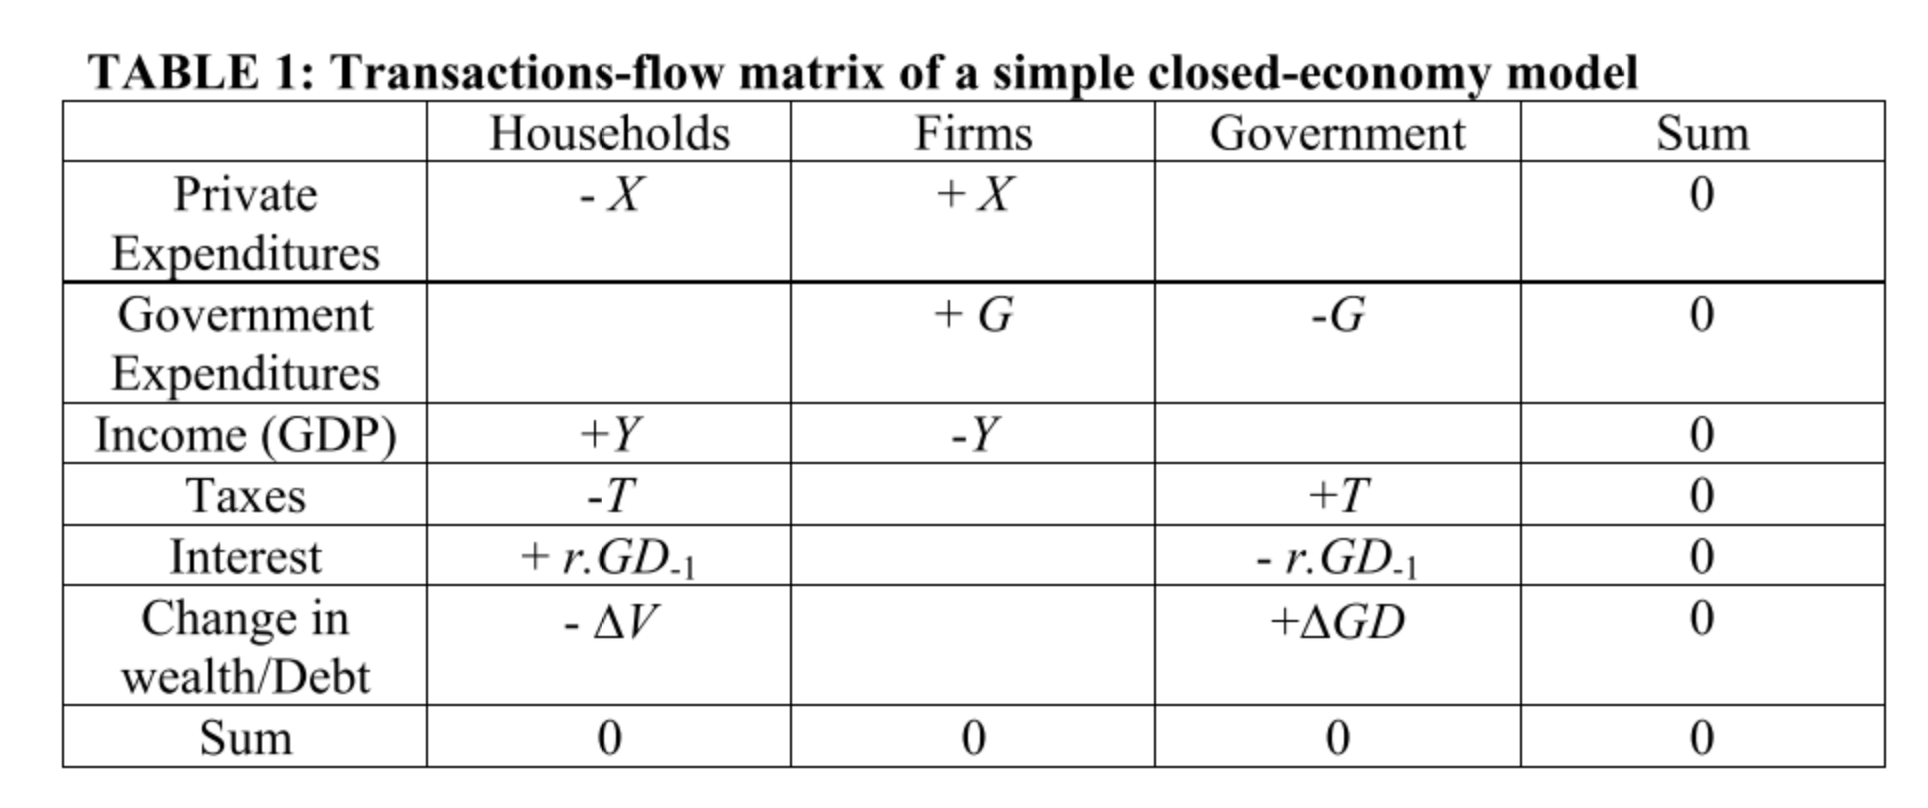

For a description of all equations and identities I have put the link to the respective paper in the description. In this Notebook, I just want to describe the expenditure behavior of households and the government:

#### Household expenditure

Using the given GDP for each period, the disposable income for households is calculated as: $$ yd = y + rr * v_{-1} - t $$ with the real interest rate $rr$ (determined by the exogenous nominal interest rate and inflation), household wealth from the previous period $v_{-1}$ and taxes $t$ (depending on the tax rate $\theta$). The share of disposable income consumed is $\alpha_1$ and depends on the parameter $\alpha_{10}$ (base level) and on the real interest rate (if the real interest rate is higher, households save more and consume less): $$\alpha_1 = \alpha_{10} - \tau \cdot rr_{-1}$$
The negative relationship between the share of disposable income consumed and real interest rate is captured by the paramter $\tau$ and is lagged (a change in $rr$ today affects $\alpha_1$ tommorow, indicated by the index $_{-1}$). Total private expenditure $x$ also depends on the level of accumulated wealth ($v_{-1}$, impact measured by $\alpha_2$): $$x = \alpha_1 \cdot yd + \alpha_2 \cdot v_{-1}$$

#### Government expenditure

The behavior of the government is very simple - and very Keynesian. Government expenditure makes exactly up for the difference between total GDP $y$ and private expenditure $x$, is keeps the output gap closed ($g = y - x$, i.e. total demand equals total poduction potential) and achieves full employment at all time. Total spending by the government ($g_T$) is the sum of government expenditure and interest payments on outstanding debt ($gd$): $$g_T = g + rr \cdot gd_{-1}$$ 
Lastly, the national deficit ($deficit = g_T - t$) adds up to the level of outstanding debt ($gd = gd_{-1} + deficit$).

#### What to see
The purpose of the model is to show that the often cited requirement for a stable debt-to-gdp-ratio gr > r (bip growth > interest on debt) is not necessary *even when the government constantly has a primary deficit* (it spends more than it collects in taxes, even when excluding interest payments on outstanding debt)! However, I want to stress that this results should not be an argument for more deficit spending: The level of government debt is neither an economic nor a moral problem. There is a huge need for green and social investment and the deficit is nothing more than an account for the net amount of money that flows from the government sector to the private sector. Therefore, governments should spend more regardless of the consequences for the debt ratio. But since conservative beliefs still stress the importance of "sustainable" debt levels/ratios (whatever this is supposed to mean), the result from this model is still one more arrow in the progressive quiver.

### The model

#### 1. Define the exogenous variables and the simulation horizon (in years).

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

input_r = widgets.IntSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='r (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

input_gr = widgets.IntSlider(
    value=2,
    min=0,
    max=5,
    step=1,
    description='gr (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

input_pi = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='pi (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

input_i = widgets.IntSlider(
    value=100,
    min=50,
    max=150,
    step=1,
    description='years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

input_theta = widgets.IntSlider(
    value=25,
    min=0,
    max=100,
    step=1,
    description='theta (%) :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

print("Nominal interest rate:")
display(input_r)
print("Growth rate GDP:")
display(input_gr)
print("Tax rate:")
display(input_theta)
print("Inflation rate:")
display(input_pi)
print("Simulation horizon (iterations):")
display(input_i)

Nominal interest rate:


IntSlider(value=3, continuous_update=False, description='r (%):', max=10)

Growth rate GDP:


IntSlider(value=2, continuous_update=False, description='gr (%):', max=5)

Tax rate:


IntSlider(value=25, continuous_update=False, description='theta (%) :')

Inflation rate:


IntSlider(value=2, continuous_update=False, description='pi (%):', max=10)

Simulation horizon (iterations):


IntSlider(value=100, continuous_update=False, description='years:', max=150, min=50)

#### 2. Optional: Change the parameters of the model

In [3]:
input_alpha10 = widgets.FloatSlider(
    value=0.9,
    min=0,
    max=1,
    step=0.1,
    description='alpha10:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_alpha2 = widgets.FloatSlider(
    value=0.2,
    min=0,
    max=1,
    step=0.1,
    description='alpha2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_tau = widgets.IntSlider(
    value=2,
    min=0,
    max=5,
    step=1,
    description='tau:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(input_alpha10)
display(input_alpha2)
display(input_tau)

FloatSlider(value=0.9, continuous_update=False, description='alpha10:', max=1.0)

FloatSlider(value=0.2, continuous_update=False, description='alpha2:', max=1.0)

IntSlider(value=2, continuous_update=False, description='tau:', max=5)

In [4]:
def run(event):
    
    global pi
    global r
    global r_G
    global theta
    global gr
    global alpha10
    global alpha2
    global tau
    
    # Set configuration of the model

    pi = input_pi.value/100 # Inflation
    r = input_r.value/100 # Nominal Interest Rate
    r_G = input_r.value/100 # Nominal Interest Rate Government Debt
    theta = input_theta.value/100 # Tax rate
    gr = input_gr.value/100 # Growth Rate GDP
    alpha10 = input_alpha10.value # Private expenditure base (relative to yd)
    alpha2 = input_alpha2.value # Reaction of private expenditure to accumulated Wealth
    tau = input_tau.value # Reaction of private expenditure to Real Interest

    i = input_i.value # Iterations (Years simulated)

    # Calculate initial values

    rr = ((1+r)/(1+pi))-1 # Real Rate of Interest
    rr_G = ((1+r_G)/(1+pi))-1 # Real Rate of Interest Goveernment Debt
    alpha1 = alpha10 - tau*rr

    y = [100] # GDP at the beginning
    v = [0]
    T = [25]
    t = [25]
    p = [1] # Price Level at the beginning
    yd = [None]
    g = [None]
    gd = [0]
    gd_q = [0]
    deficit_q = [0]
    primary_deficit_q = [0]
    g_T = [None]
    x = [None]
    nafa = [None] # Accumulated net financial Assets private Sector
    deficit = [None]
    primary_deficit = [None]
    control = [None]
    year = [0]    
    
    # Run Model    
    
    counter = 0

    while counter < i:
        counter += 1
        y.append(y[-1]*(gr+1))
        p.append(p[-1]*(pi+1))
        interest = r*v[-1]*p[-2]
        T.append(theta * (y[-1]*p[-1] + interest))
        t.append(T[-1]/p[-1])
        yd.append(y[-1] + rr*v[-1] - t[-1])
        x.append((alpha10 - tau*rr)*yd[-1] + alpha2*v[-1])
        v.append(v[-1] + yd[-1] - x[-1])
        g.append(y[-1] - x[-1])
        g_T.append(g[-1] + rr_G * gd[-1])
        deficit.append(g_T[-1] - t[-1])
        gd.append(gd[-1] + deficit[-1])
        nafa.append((y[-1] + interest/p[-1] - t[-1]) - x[-1])
        control.append(nafa[-1]/p[-1] - deficit[-1])
        gd_q.append(100*gd[-1]/y[-1])
        year.append(year[-1]+1)
        deficit_q.append(100*deficit[-1]/y[-1])
        primary_deficit_q.append(100*(g[-1] - t[-1])/y[-1])
        primary_deficit.append(g[-1] - t[-1])
        
    # Save Data     
    
    global results
    global data
    gd_inverted = [-i for i in gd]
    results = list(zip(year, y, gd_inverted, gd_q, deficit, deficit_q, primary_deficit, g, g_T, yd, x, nafa,v))
    data = pd.DataFrame(results, columns = ['year', 'gdp', 'government debt', 'debt ratio (%)', 'deficit', 'deficit ratio (%)', 'primary deficit', 
                                            'government expenditure (w/o interest)', 'total spending', 
                                            'disposable  income', 'private expenditure', 
                                            'net accumulation of financial assets', 'private wealth'])
        
    print("Finished! Inputs: inflation = " + str(pi) + ", gdp growth = " + str(gr) + ", nominal interest rate = " + str(r))

In [5]:
def anzeige(event):
    display(data)

#### 3. Run the simulation

In [6]:
button = widgets.Button(description="Calculation")
display(button)
button.on_click(run)

Button(description='Calculation', style=ButtonStyle())

### The results

#### View total data

In [7]:
button2 = widgets.Button(description="Data")
display(button2)
button2.on_click(anzeige)

Button(description='Data', style=ButtonStyle())

In [8]:
def grafic(event):
    print("Configuration: inflation = " + str(pi) + ", gdp growth = " + str(gr) + ", nominal interest rate = " + str(r)
         + "\n                 alpha10 = " + str(alpha10) + ", alpha2 = " + str(alpha2) + ", tau = " + str(tau))
    
    ax=data.plot(kind="line", x="year", y="debt ratio (%)", color="DarkBlue", figsize=(7, 4))
    ax.set_ylabel("debt/gdp in %")
    ax2=data.plot(kind="line", x="year", y="deficit ratio (%)", linestyle="dashed", color="DarkGreen", secondary_y=True, ax=ax)
    ax2.set_ylabel("deficit/gdp in %")
    ax.set_title("Debt ratio und deficit ratio")
    plt.grid(True)
    
    bx=data.plot(kind="line", x="year", y="private expenditure", color="Green", figsize=(7, 4))
    bx2=data.plot(kind="line", x="year", y="government expenditure (w/o interest)", color="Orange", ax=bx)
    bx3=data.plot(kind="line", x="year", y="gdp", color="Black", linestyle="dashed", ax=bx)
    plt.title("Private and public expenditure")
    plt.ylabel(" ")
    plt.grid(True)
    
    cx=data.plot(kind="line", x="year", y="government debt", color="Red", figsize=(7, 4))
    cx2=data.plot(kind="line", x="year", y="private wealth", color="Purple", ax=cx)
    plt.title("Government debt = Private wealth")
    plt.ylabel(" ")
    plt.grid(True)

#### Visualisation of the central variables

In [9]:
button3 = widgets.Button(description="Grafic")
display(button3)
button3.on_click(grafic)

Button(description='Grafic', style=ButtonStyle())

## Extension 1: A Fiscal Policy Reaction Function

Now that we have seen that deficit in an $gr < r$ environment does not lead to an exploding debt-to-gdp level, we can do a policy experiment (which we could have done anyways, of course). Firstly, we distinguish between a constantly growing potential output $ys = ys_{-1}(1+gr)$ and a demand-led actual output $y = g + x$. Secondly, we make the inflation rate endogenous and dependant on the output gap (the sensitivity of this relationship is captured by $\gamma$): $$\pi = \pi_{-1} + \epsilon + \gamma \frac{y - ys}{y}$$
The variable $\epsilon$ is some cost-side determinant (e.g., a sudden rise in oil prices). While the whole model so far has been typical for the post-keynesian school of thought, this introduction of the concept of a vertical Phillips Curve (typical for the so called "New Consesus" a.k.a. the mainstream) seems odd. But as Godley and Lavoie point out, this is just for the sake of discussion. Moreover, in a world where inflation is not affected by the output gap, the following observations hold even more.

In this experiment, monetary policy is purely passive and aims only at holding the real rate of interest constant by changing the nominal interest rate ($r = rr + \pi + \pi \cdot rr$). The task of achieving a constant rate of inflation is undertaken by the government. Thereto, it changes the growth rate ($gr_G$) for its expenditures ($g = g_{-1}(1 + gr_G)$) according to the previous change in inflation ($\Delta \pi_{-1}$) and the deviation of current inflation from the inflation target $\pi^T$: $$gr_G = gr - \beta_1 \cdot \Delta \pi_{-1} - \beta_2 (\pi_{-1} - \pi^T)$$
When inflation is constant and at its target level, government expenditures grow with the same rate as the economy ($gr$, thereby holding the ratio of government expenditures to GDP constant). This reaction function is very similar to those normally used for describing the behavior of central banks.

To simulate the model, we now need slightly different inputs, namely the inflation target of the government and the real interest rate target of the central bank:

In [10]:
input_pi_T = widgets.IntSlider(
    value=2,
    min=0,
    max=5,
    step=1,
    description='pi^T (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_rr_T = widgets.FloatSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='r^T (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

input_pi_0 = widgets.FloatSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='pi0 (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

print("Inflation target (government) in %:")
display(input_pi_T)
print("Real interest rate target (central bank) in %:")
display(input_rr_T)
print("Inflation at the beginning in %:")
display(input_pi_0)

Inflation target (government) in %:


IntSlider(value=2, continuous_update=False, description='pi^T (%):', max=5)

Real interest rate target (central bank) in %:


FloatSlider(value=3.0, continuous_update=False, description='r^T (%):', max=10.0, readout_format='d', step=1.0…

Inflation at the beginning in %:


FloatSlider(value=2.0, continuous_update=False, description='pi0 (%):', max=10.0, readout_format='d', step=1.0…

The new parameters determining the strength of the fiscal reaction to a inflation rate deviation also need values ($\epsilon = 0$) and of the inflation reation to the output gap. All other parameters are taken from the above model. The parameters $\beta_1$ and $\beta_2$ determine the reaction of the government to deviations of the inflation rate to the inflation target and are, therefore, crucial for the success of the fiscal policies. Experimenting with the sliders, you can see that big changes in those parameters can also lead to "government failure".

In [11]:
input_beta1 = widgets.FloatSlider(
    value=5,
    min=0,
    max=10
    ,
    step=0.1,
    description='beta1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_beta2 = widgets.FloatSlider(
    value=2,
    min=0,
    max=5,
    step=0.1,
    description='beta2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_gamma = widgets.FloatSlider(
    value=0.8,
    min=0,
    max=2,
    step=0.1,
    description='gamma:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)


display(input_beta1)
display(input_beta2)
display(input_gamma)

FloatSlider(value=5.0, continuous_update=False, description='beta1:', max=10.0)

FloatSlider(value=2.0, continuous_update=False, description='beta2:', max=5.0)

FloatSlider(value=0.8, continuous_update=False, description='gamma:', max=2.0)

In [12]:
def run2(event):
    
    global beta1
    global beta2
    global gamma
    global pi_T
    global r_T
    global rr
    global pi
    
    # Set configuration of the model
    
    pi_T = input_pi_T.value/100
    theta = input_theta.value/100 # Tax rate
    gr = input_gr.value/100 # Growth Rate GDP
    alpha10 = input_alpha10.value # Private expenditure base (relative to yd)
    alpha2 = input_alpha2.value # Reaction of private expenditure to accumulated Wealth
    tau = input_tau.value # Reaction of private expenditure to Real Interest
    beta1 = input_beta1.value
    beta2 = input_beta2.value
    gamma = input_gamma.value

    i = input_i.value # Iterations (Years simulated)

    # Calculate initial values

    rr = input_rr_T.value/100 # Real Rate of Interest
    rr_G = rr # Real Rate of Interest Goveernment Debt
    alpha1 = alpha10 - tau*rr

    ys = [100] # Potential GDP at the beginning
    y = [100]
    y_gap = [0]
    v = [100]
    T = [25]
    t = [25]
    p = [1] # Price Level at the beginning
    pi = [input_pi_0.value/100,input_pi_0.value/100]
    r = [rr + input_pi_0.value + input_pi_0.value * rr]
    yd = [75]
    g = [15]
    gd = [0]
    gd_q = [0]
    deficit_q = [0]
    primary_deficit_q = [0]
    g_T = [None]
    x = [86]
    nafa = [None] # Accumulated net financial Assets private Sector
    deficit = [None]
    primary_deficit = [None]
    control = [None]
    year = [0]    
    
    # Run Model    
    
    counter = 0
    global interest

    while counter < i:
        counter += 1
        gr_G = gr - beta1*(pi[-1]-pi[-2]) - beta2*(pi[-1]-pi_T)
        ys.append(ys[-1]*(gr+1))
        g.append(g[-1]*(1+gr_G))
        p.append(p[-1]*(pi[-1]+1))
        interest = r[-1]*v[-1]*pi[-2]
        T.append(theta * (y[-1]*p[-1] + interest))
        t.append(T[-1]/p[-1])
        yd.append(y[-1] + rr*v[-1] - t[-1])
        x.append((alpha10 - tau*rr)*yd[-1] + alpha2*v[-1])
        y.append(g[-1] + x[-1])
        pi.append(pi[-1] + gamma*(y[-1] - ys[-1])/y[-1])
        r.append(rr + pi[-1] + pi[-1]*rr)
        v.append(v[-1] + yd[-1] - x[-1])
        g_T.append(g[-1] + rr_G * gd[-1])
        deficit.append(g_T[-1] - t[-1])
        gd.append(gd[-1] + deficit[-1])
        nafa.append((y[-1] + interest/p[-1] - t[-1]) - x[-1])
        control.append(nafa[-1]/p[-1] - deficit[-1])
        gd_q.append(100*gd[-1]/y[-1])
        year.append(year[-1]+1)
        deficit_q.append(100*deficit[-1]/y[-1])
        primary_deficit_q.append(100*(g[-1] - t[-1])/y[-1])
        primary_deficit.append(g[-1] - t[-1])
        y_gap.append(y[-1] - ys[-1])
        
    # Save Data     
    
    pi.pop(0)
    global results2
    global data2
    gd_inverted = [-i for i in gd]
    results2 = list(zip(year, y, y_gap, gd_inverted, gd_q, deficit, deficit_q, pi, x, g, r, t, v))
    data2 = pd.DataFrame(results2, columns = ['year', 'gdp', 'output gap', 'government debt','debt ratio (%)', 'deficit', 'deficit ratio (%)',  
                                            'inflation', 'private expenditure', 'government expenditure (w/o interest)', 
                                            'nominal interest rate', 'taxes', 'private wealth'])
    print("Finished! Inputs: Inflation target = " + str(pi_T) + ", real interest target = "
          + str(rr) + ", inflation at the beginning = " + str(pi[0]))

In [13]:
button4 = widgets.Button(description="Calculation")
display(button4)
button4.on_click(run2)

Button(description='Calculation', style=ButtonStyle())

In [14]:
def anzeige2(event):
    display(data2)

button5 = widgets.Button(description="Data")
display(button5)
button5.on_click(anzeige2)

Button(description='Data', style=ButtonStyle())

In [15]:
def grafic2(event):
    print("Configuration:  inflation target = " + str(pi_T) + ", real interest target = " 
          + str(rr) + ", inflation at the beginning = " + str(pi[0])
          + "\n                 beta1 = " + str(beta1) + ", beta2 = " + str(beta2) + ", gamma = " + str(gamma))
    
    ax=data2.plot(kind="line", x="year", y="inflation", color="DarkBlue", figsize=(7, 4))
    ax.set_ylabel("Inflation")
    ax.set_ylim([-0.1,0.1])
    ax.axhline(pi_T, color="Black")
    ax2=data2.plot(kind="line", x="year", y="deficit ratio (%)", linestyle="dashed", color="DarkGreen", secondary_y=True, ax=ax)
    ax2.set_ylabel("deficit/gdp")
    ax.set_title("Inflation und deficit ratio")
    plt.grid(True)
    
    bx=data2.plot(kind="line", x="year", y="private expenditure", color="Green", figsize=(7, 4))
    bx.set_ylabel("Expenditures")
    bx2=data2.plot(kind="line", x="year", y="government expenditure (w/o interest)", color="Orange", ax=bx)
    plt.title("Private and public expenditure")
    plt.ylabel(" ")
    plt.grid(True)
    
    cx=data2.plot(kind="line", x="year", y="output gap", color="Black", figsize=(7, 4))
    cx.axhline(0, color="Black", linestyle="dashed")
    plt.title("Output Gap")
    plt.ylabel("in %")
    plt.grid(True)
    
    dx=data.plot(kind="line", x="year", y="government debt", color="Red", figsize=(7, 4))
    dx2=data.plot(kind="line", x="year", y="private wealth", color="Purple", ax=dx)
    plt.title("Government debt = Private wealth")
    plt.ylabel(" ")
    plt.grid(True)

In [16]:
button6 = widgets.Button(description="Grafic")
display(button6)
button6.on_click(grafic2)

Button(description='Grafic', style=ButtonStyle())

#### What to see
In case the value of the policy parameters are not changed drastically, the government does in the medium and long term succeed in determining the inflation rate through fiscal policy. This result even holds varying the size of the inflation reaction to the output gap ($\gamma$). The government is also able to close the output gap and, thereby, achieves full employment. I wanna point out that in the paper by Godley and Lavoie all parameters are set to values that ensure successfull inflation targeting from the beginning - unfortunately, they do not tell the reader those values. In contrast, the following second extension is not in their paper and not designed by them.

## Extension 2: The Effect of a Deficit Break

Despite the potential power of fiscal policy with regard to inflation targeting and full employment, both politicians and academics (and, therefore, the public) are often reluctant to unleash it. Their primary concerns are about the debt level and the annual deficits, which is why some countries have some sort of deficit break written in their laws. Those balanced budget amendments define a more or less flexible cap for the maximum deficit level allowed. In Germany, for example, the deficit break allows for constrained reaction to negative output gaps by only limiting the structural deficit (the deficit in the hypothetical case that the output gap is closed) - which, in reality, is difficult to calculate and often follows the movement of actual GDP. But since the basic model above does not include business cycles, this aspect is ignored and the deficit limited relative to GDP in the prior year. Of course, this threshold only takes affect, if the desired deficit size of the government (to close the output gap) is higher. As above, all variables are denominated in real terms.

In addition, one could also imagine an upper limit forthe level of accumulated government debt relative to GDP - even though no country has yet implement such a rule to the best of my knowledge. For the default value (300%) this rule is de facto not in effect, because the debt-to-gdp ratio does not reach that threshould within the simulation horizon.

#### What to see
One can make two important observation:
1. A deficit and/or debt limit that prevents the government from spending enough to balance potential gdp and effective demand ($x + g = y = ys$) leads to slower real growth rates. After 100 years the government may have a lower debt level but the economy as a whole is less wealthy.
2. Because an effective deficit limits lowers economic growth, the debt-to-gdp level can, in the long run, actually be *higher* under a deficit break framework than without! This examplifies the absurdity of balanced budget amendments.

In [17]:
input_limit_def = widgets.FloatSlider(
    value=3.5,
    min=0,
    max=10,
    step=0.1,
    description='in %:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

input_limit_debt = widgets.IntSlider(
    value=300,
    min=0,
    max=300,
    step=10,
    description='in %:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

print("Deficit limit (relative to GDP):")
display(input_limit_def)
print("Debt limit (relative to GDP):")
display(input_limit_debt)


Deficit limit (relative to GDP):


FloatSlider(value=3.5, continuous_update=False, description='in %:', max=10.0)

Debt limit (relative to GDP):


IntSlider(value=300, continuous_update=False, description='in %:', max=300, step=10)

In [18]:
def run3(event):
    
    global pi
    global r
    global r_G
    global theta
    global gr
    global alpha10
    global alpha2
    global tau
    global limit
    global limit_def
    global limit_debt
    
    # Set configuration of the model

    pi = input_pi.value/100 # Inflation
    r = input_r.value/100 # Nominal Interest Rate
    r_G = input_r.value/100 # Nominal Interest Rate Government Debt
    theta = input_theta.value/100 # Tax rate
    gr = input_gr.value/100 # Growth Rate GDP
    alpha10 = input_alpha10.value # Private expenditure base (relative to yd)
    alpha2 = input_alpha2.value # Reaction of private expenditure to accumulated Wealth
    tau = input_tau.value # Reaction of private expenditure to Real Interest
    
    limit_def = input_limit_def.value/100
    limit_debt = input_limit_debt.value
    
    i = input_i.value # Iterations (Years simulated)

    # Calculate initial values

    rr = ((1+r)/(1+pi))-1 # Real Rate of Interest
    rr_G = ((1+r_G)/(1+pi))-1 # Real Rate of Interest Goveernment Debt
    alpha1 = alpha10 - tau*rr
    
    global yd

    ys = [100]
    y = [100] # GDP at the beginning
    y_gap = [0]
    v = [0]
    T = [25]
    t = [25]
    p = [1] # Price Level at the beginning
    yd = [75]
    g = [None]
    gd = [0]
    gd_q = [0]
    deficit_q = [0]
    primary_deficit_q = [0]
    g_T = [None]
    x = [70]
    nafa = [None] # Accumulated net financial Assets private Sector
    deficit = [None]
    primary_deficit = [None]
    control = [None]
    year = [0]    
    
    # Run Model    
    
    counter = 0

    while counter < i:
        counter += 1
        ys.append(ys[-1]*(gr+1))
        p.append(p[-1]*(pi+1))
        interest = r*v[-1]*p[-2]
        T.append(theta * (y[-1]*p[-1] + interest))
        t.append(T[-1]/p[-1])
        yd.append(y[-1] + rr*v[-1] - t[-1])
        x.append((alpha10 - tau*rr)*yd[-1] + alpha2*v[-1])
        v.append(v[-1] + yd[-1] - x[-1])
        g_ideal = ys[-1] - x[-1] # Government spending without a deficit limit
        if gd_q[-1] < limit_debt:
            if g_ideal + (rr_G * gd[-1]) < t[-1] + (limit_def*y[-1]):
                g.append(g_ideal)
            else:
                g.append(t[-1] + (limit_def*y[-1]) - (rr_G*gd[-1]))
        else:
            if g_ideal + (rr_G * gd[-1]) < t[-1]:
                g.append(g_ideal)
            else:
                g.append(t[-1])
        g_T.append(g[-1] + rr_G * gd[-1])
        y.append(x[-1] + g[-1])
        deficit.append(g_T[-1] - t[-1])
        gd.append(gd[-1] + deficit[-1])
        nafa.append((y[-1] + interest/p[-1] - t[-1]) - x[-1])
        control.append(nafa[-1]/p[-1] - deficit[-1])
        gd_q.append(100*gd[-1]/y[-1])
        year.append(year[-1]+1)
        deficit_q.append(100*deficit[-1]/y[-1])
        primary_deficit_q.append(100*(g[-1] - t[-1])/y[-1])
        primary_deficit.append(g[-1] - t[-1])
        y_gap.append(y[-1] - ys[-1])
        
    # Save Data     
        
    global results3
    global data3
    results3 = list(zip(year, ys, y, yd, y_gap, gd, gd_q, deficit, deficit_q, primary_deficit, g, g_T, yd, x, nafa,v))
    data3 = pd.DataFrame(results3, columns = ['year', 'potential gdp', 'gdp', 'disposable income', 'output gap', 
                                              'government debt', 'debt ratio (%)', 'deficit', 'deficit ratio (%)', 
                                              'primary deficit', 'government expenditure (w/o interest)', 
                                              'total spending', 'disposable  income', 'private expenditure', 
                                            'net accumulation of financial assets', 'private wealth'])
        
    print("Finished! Inputs: inflation = " + str(pi) + ", gdp growth = " + str(gr) + 
          ", deficit limit = " + str(limit_def) + ", debt limit = " + str(limit_debt))

In [19]:
button7 = widgets.Button(description="Calculation")
display(button7)
button7.on_click(run3)

Button(description='Calculation', style=ButtonStyle())

In [20]:
def grafic3(event):
    print("Configuration:  inflation = " + str(pi) + ", nominal interest rate = " 
          + str(r) + ", deficit limit = " + str(limit_def) + ", debt limit = "
          + str(limit_debt))
    
    ax=data3.plot(kind="line", x="year", y="debt ratio (%)", color="DarkBlue", figsize=(7, 4))
    ax.set_ylabel("debt/gdp in %")
    ax2=data3.plot(kind="line", x="year", y="deficit ratio (%)", linestyle="dashed", color="DarkGreen", secondary_y=True, ax=ax)
    ax2.set_ylabel("deficit/gdp in %")
    ax2.axhline(limit_def*100, color="Red", label="deficit limit")
    ax2.set_ylim([-2,10])
    ax.set_title("Debt ratio und deficit ratio")
    plt.grid(True)
    
    bx=data3.plot(kind="line", x="year", y="private expenditure", color="Green", figsize=(7, 4))
    bx.set_ylabel("Expenditures")
    bx2=data3.plot(kind="line", x="year", y="government expenditure (w/o interest)", color="Orange", ax=bx)
    plt.title("Private and public expenditure")
    plt.ylabel(" ")
    plt.grid(True)
    
    cx=data3.plot(kind="line", x="year", y="potential gdp", color="Green", figsize=(7, 4))
    cx2=data3.plot(kind="line", x="year", y="gdp", color="Blue", ax=cx)
    cx3=data3.plot(kind="line", x="year", y ="output gap", color="Red", ax=cx)
    plt.title("Real growth loss")
    plt.grid(True)

In [21]:
def anzeige3(event):
    display(data3)

button8 = widgets.Button(description="Data")
display(button8)
button8.on_click(anzeige3)

Button(description='Data', style=ButtonStyle())

In [22]:
button9 = widgets.Button(description="Grafic")
display(button9)
button9.on_click(grafic3)

Button(description='Grafic', style=ButtonStyle())

## What do we make of all this?

Needless to say, one cannot deduce detailed policy demands from a theoretical model - especially from a relatively simple one like the one above. However, as long as a model is internally consistent and captures all relevant mechanisms of the economic aspect studied, it is legitimate to derive political implications. In this case, the implication should be clear: Instead of worrying about debt levels and deficits, one should use fiscal policy to accomplish real goals like full employment or green investments. The theoretical observations from stock-flow-consistent models (which are per se much more realistic than neoclassic math-toys like DSGE models) lead us to important findings:

1. Government deficits are private sector surpluses.
2. Insufficient fiscal spending can lead to lower growth rates and even higher debt-to-gdp-ratios in the long run.
3. Fiscal policy has the potential to stabilize inflation and/or to achieve full employment.

In times of an urgent planetary crisis, over 760 Million people in poverty and social problems in all societies around the globe (*and* low inflation), it is simply a moral failure to cling to old ideas about debt ceilings and deficit breaks. Ceterum censeo, governments do not have to issue bonds for every dollar/euro/etc. they spend more than they tax (in fact, MMT shows us that government expenditures come *before* taxation), because they can literally just print money without the potentially problematic distribution effects of government bonds. But that is a problem for another day - and another model because the above does not include social classes and, therefore, cannot include distributional effects. For now let's just remember this: Fiscal deficits do no harm per se and can even solve great problems. The money is there, we just have to use it.